## CS5102 - DIP Project | Quality Inspection of the Workpiece

Group: 29 <br>
Authors: <br>
 Deep Patel, ME21D0004 <br>
 Radhika Mittal, CED19I050 <br>
 Yash Kumar Sahu, CED19I039 

In [2]:
import os
import cv2
from matplotlib import pyplot as plt   

# Problem Domain

<img src=".\roblem.png" >
<img src=".\domain2.png">
<img src=".\domain3.jpg">

# What is Existing?

[//]: # (Add some pictures from relevant literature) 

# What is Done?

## Image acquisition

<img src=".\workspace.png" >

**Workspace setup**

Camera Model: IS7802

40 sample images (Varied illumination, Posistion and orientation)

Workpiece size: ~25mm DIA and 30mm DIA (approx) 
Workpiece type: Aluminum 7075 and 6061

**Assumptions**

Similar
-  Reflective Property
-  Illumination
-  Height







## Colour image processing | Reading Input Color Image as Grayscale

No. of Images =  40


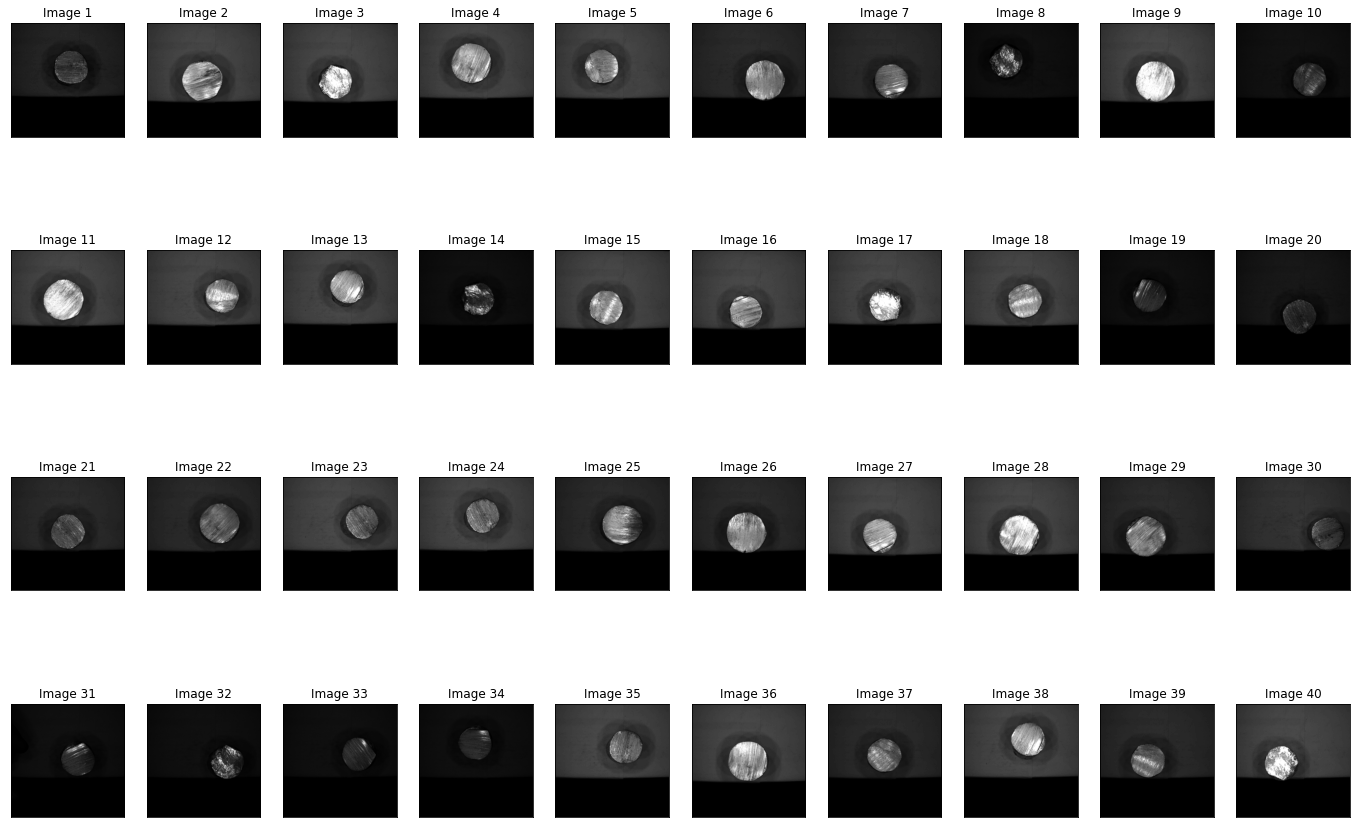

In [3]:
from matplotlib import pyplot as plt  
import cv2
import glob
import os
from PIL import Image, ImageOps 
import numpy as np

images = [Image.open(file) for file in glob.glob(os.getcwd()+"/dataset/*.BMP")]
print("No. of Images = ", len(images))
meta_data=np.logical_not(np.asarray([0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0]))
gray_images=[]
rgb_images=[]
new_width=900
new_height=900

plt.rcParams["figure.figsize"]=24,16
for i in range(len(images)):
    im=images[i]
    width, height = im.size  # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    im2=np.array(im)
    rgb_images.append(im2)
    im=ImageOps.grayscale(im)
    im=np.array(im)
    gray_images.append(im)
    
    
for i in range(len(gray_images)):    
    plt.subplot(4,10,i+1),plt.imshow(gray_images[i],'gray')
    plt.title("Image "+str(i+1))
    plt.xticks([]),plt.yticks([])
plt.show()



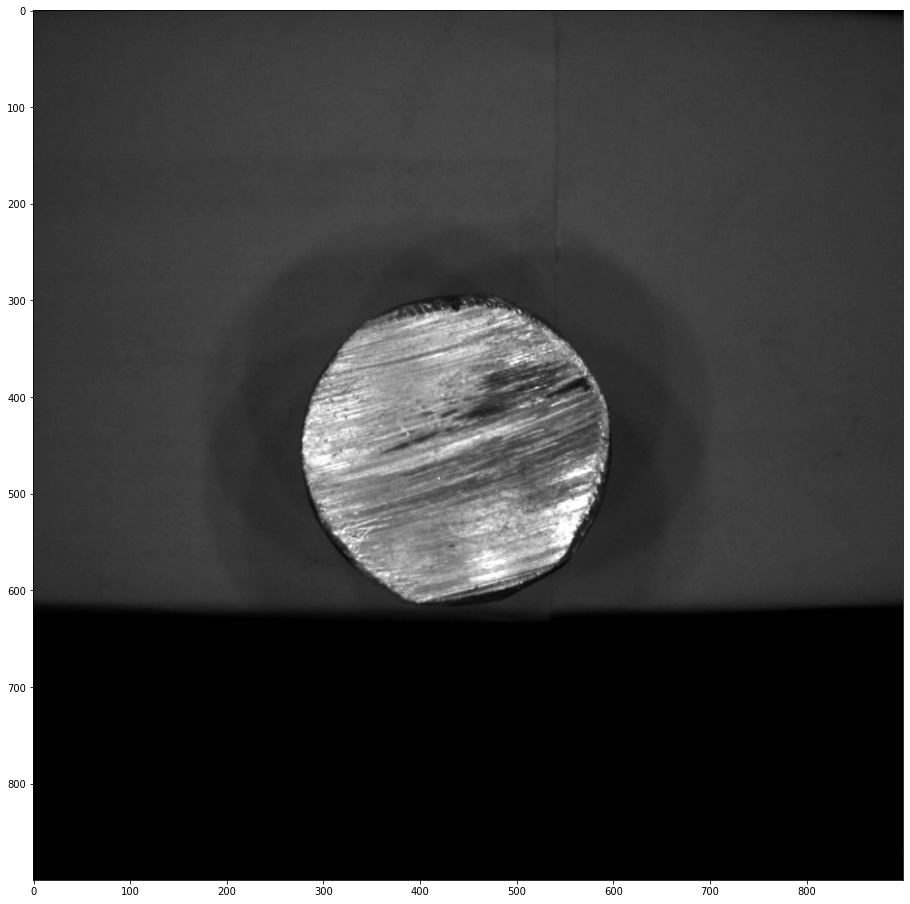

In [6]:
plt.imshow(gray_images[1], cmap='gray', vmin = 0, vmax = 255)

No. of Images =  8


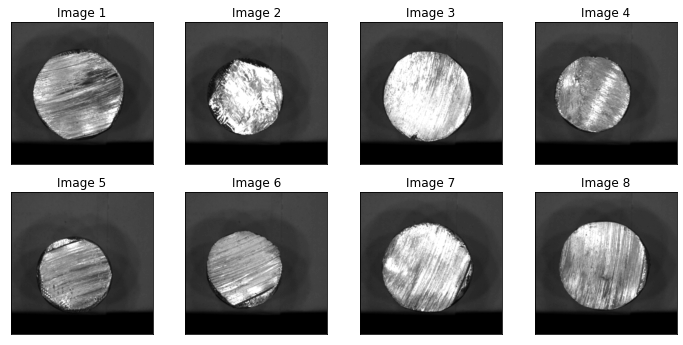

In [54]:
#Reading input image
#Input list of images from path

#images = [cv2.imread(file,0) for file in glob.glob("/home/yash/files/git/CS5102-Digital-Image-Processing-Courseworks/Project/dataset/*.BMP")]
images_y = [Image.open(file) for file in glob.glob("/home/yash/files/git/CS5102-Digital-Image-Processing-Courseworks/Project/dataset/2/*.BMP")]
print("No. of Images = ", len(images_y))

gray_images_y=[]
rgb_images_y=[]
new_width_y=500
new_height_y=500

plt.rcParams["figure.figsize"]=12,12
for i in range(len(images_y)):
    im=images_y[i]
    width, height = im.size  # Get dimensions

    left = (width - new_width_y)/2
    top = (height - new_height_y)/2
    right = (width + new_width_y)/2
    bottom = (height + new_height_y)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    im2=np.array(im)
    rgb_images_y.append(im2)
    im=ImageOps.grayscale(im)
    im=np.array(im)
    gray_images_y.append(im)
    
    
for i in range(len(gray_images_y)):    
    plt.subplot(4,4,i+1),plt.imshow(gray_images_y[i],'gray')
    plt.title("Image "+str(i+1))
    plt.xticks([]),plt.yticks([])
plt.show()

## Image filtering and enhancement

### Thresholding

#### Binary Threshloding

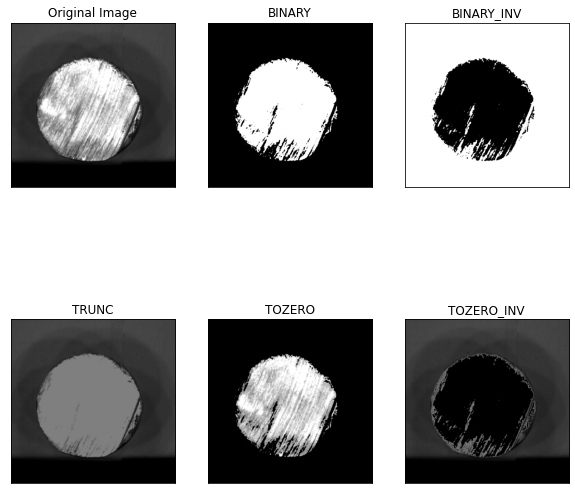

In [56]:
## Simple Thresholding

# For every pixel, the same threshold value is applied. 
# If the pixel value is smaller than the threshold, it is set to 0, 
# otherwise it is set to a maximum value. The function cv.threshold 
# is used to apply the thresholding. The first argument is the source image, 
# which should be a grayscale image. The second argument is the threshold 
# value which is used to classify the pixel values. The third argument is 
# the maximum value which is assigned to pixel values exceeding the threshold.
plt.rcParams["figure.figsize"]=10,10
img=gray_images_y[6]
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
thresh_images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(thresh_images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### Adaptive Threshloding

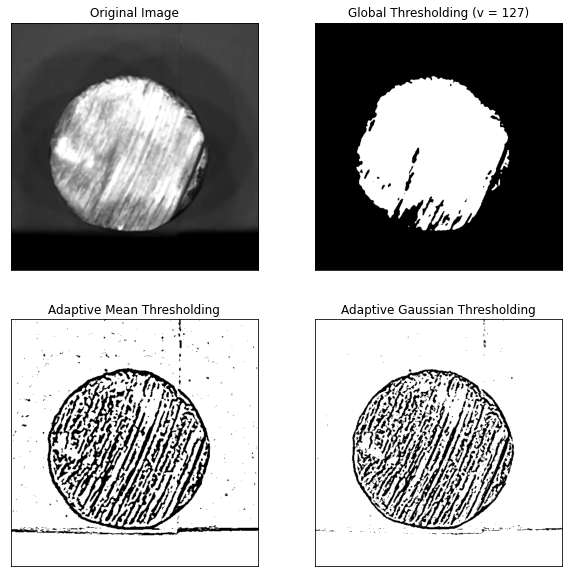

In [57]:
## Adaptive Thresholding

# In the previous section, we used one global value as a threshold. 
# But this might not be good in all cases, e.g. if an image has different 
# lighting conditions in different areas. In that case, 
# adaptive thresholding can help. Here, the algorithm determines the 
# threshold for a pixel based on a small region around it. 
# So we get different thresholds for different regions of the same image 
# which gives better results for images with varying illumination.

# The adaptiveMethod decides how the threshold value is calculated:
## cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
## cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

# The blockSize determines the size of the neighbourhood area and C is a 
# constant that is subtracted from the mean or weighted sum of the 
# neighbourhood pixels.
img=gray_images_y[6]
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
aThresh_images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(aThresh_images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



#### Otsu's Thresholding

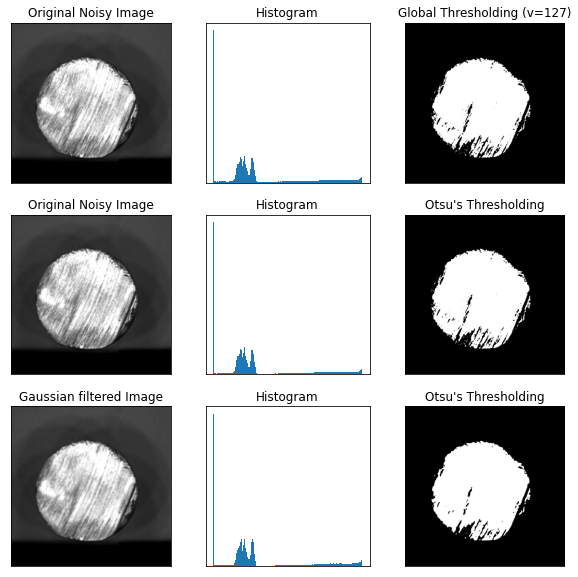

In [58]:
## Otsu's Binarization

# In global thresholding, we used an arbitrary chosen value as a threshold. 
# In contrast, Otsu's method avoids having to choose a value and determines 
# it automatically.

# Consider an image with only two distinct image values (bimodal image), 
# where the histogram would only consist of two peaks. A good threshold 
# would be in the middle of those two values. Similarly, Otsu's method 
# determines an optimal global threshold value from the image histogram.

# In order to do so, the cv.threshold() function is used, 
# where cv.THRESH_OTSU is passed as an extra flag. The threshold value can 
# be chosen arbitrary. The algorithm then finds the optimal threshold value 
# which is returned as the first output.
img=gray_images_y[6]
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
oThresh_images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 'Original Noisy Image','Histogram',"Otsu's Thresholding",'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(oThresh_images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(oThresh_images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(oThresh_images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()



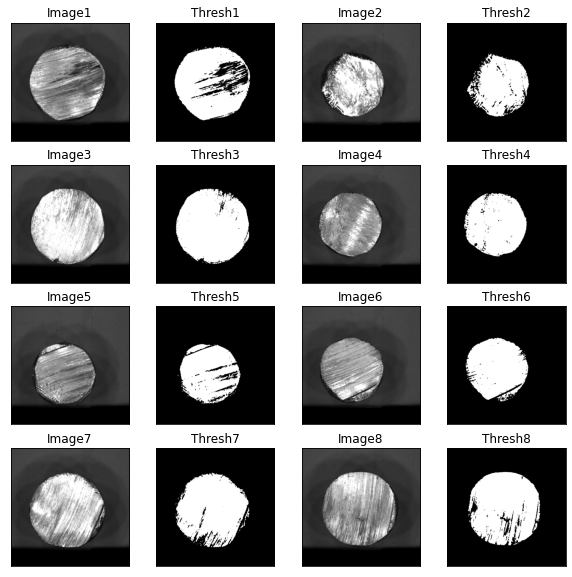

In [59]:
## Otsu's Thresholding on all images

grayThresh_y=[]

for i in range(len(gray_images_y)):    
    img=gray_images_y[i]
    # Otsu's thresholding
    ret,th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    grayThresh_y.append(th)
    plt.subplot(4,4,i*2+1),plt.imshow(img,'gray')
    plt.title("Image"+str(i+1)), plt.xticks([]), plt.yticks([])
    plt.subplot(4,4,i*2+2),plt.imshow(th,'gray')
    plt.title("Thresh"+str(i+1)), plt.xticks([]), plt.yticks([])
plt.show()

### Gaussian Filter

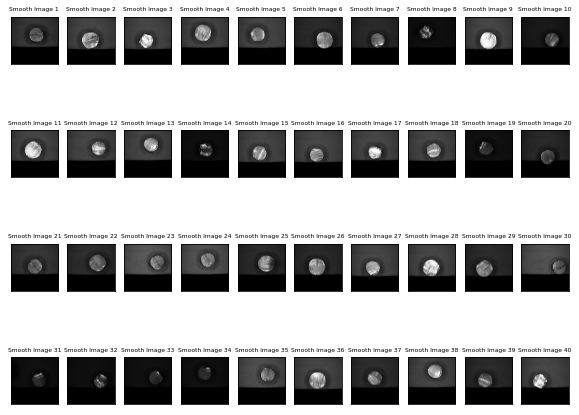

In [50]:
kernel = np.ones((5,5),np.float32)/25
smooth_images=[]
for i in range(len(gray_images)):
    smooth_images.append(cv2.filter2D(gray_images[i],-1,kernel))
    
    plt.subplot(4,10,i+1),plt.imshow(smooth_images[i],'gray')
    plt.title("Smooth Image "+str(i+1),fontsize=6)
    plt.xticks([]),plt.yticks([])

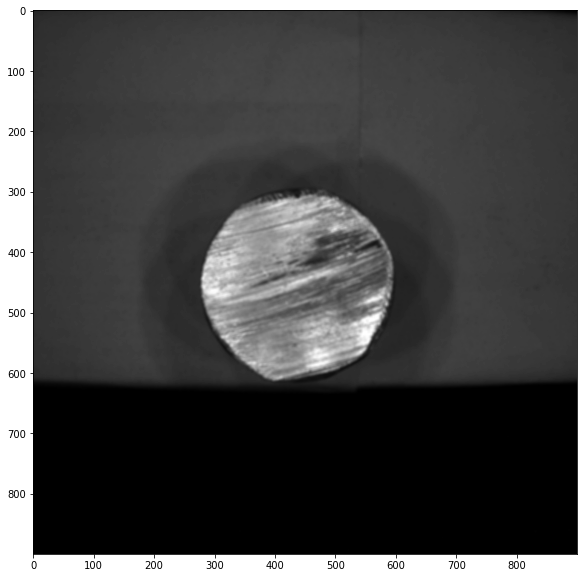

In [10]:
plt.imshow(smooth_images[1], cmap='gray', vmin = 0, vmax = 255)

### Median Filter


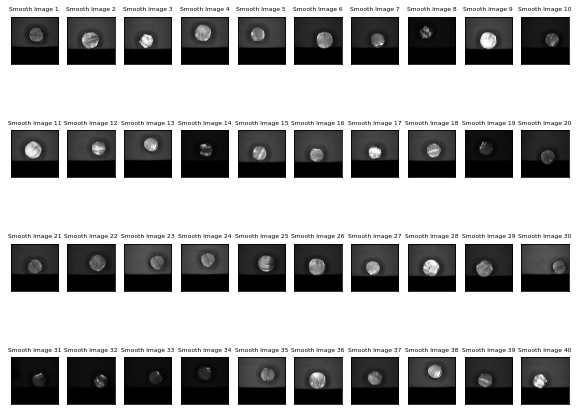

In [48]:
smooth_images=[]
for i in range(len(gray_images)):
    smooth_images.append(cv2.medianBlur(gray_images[i], 5))
    plt.subplot(4,10,i+1),plt.imshow(smooth_images[i],'gray')
    plt.title("Smooth Image "+str(i+1),fontsize=6)
    plt.xticks([]),plt.yticks([])

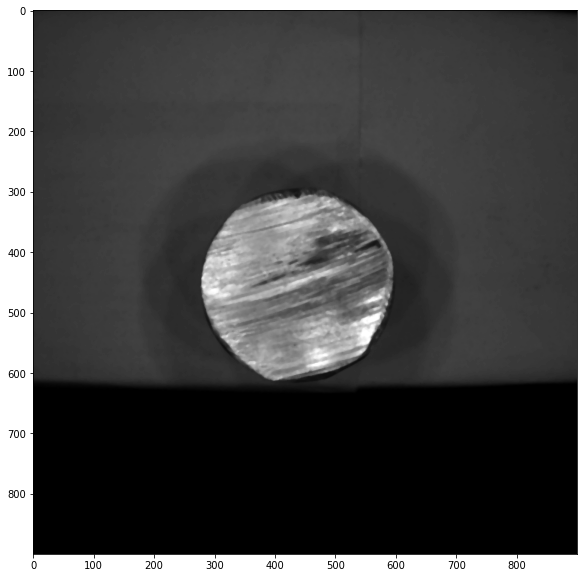

In [12]:
plt.imshow(smooth_images[1], cmap='gray', vmin = 0, vmax = 255)

### Histogram Equalisation


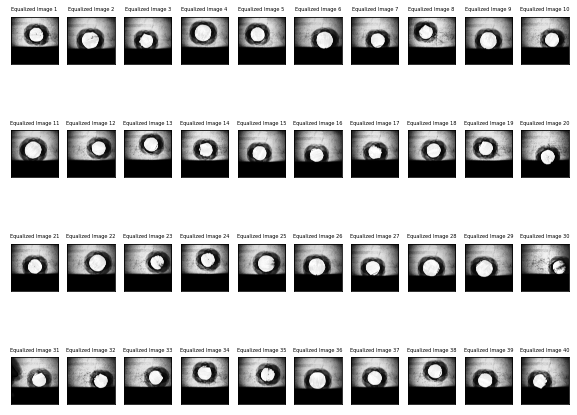

In [46]:
equal_images=[]
for i in range(len(smooth_images)):
    equal_images.append(cv2.equalizeHist(smooth_images[i]))
    plt.subplot(4,10,i+1),plt.imshow(equal_images[i],'gray')
    plt.title("Equalized Image "+str(i+1),fontsize=5)
    plt.xticks([]),plt.yticks([])

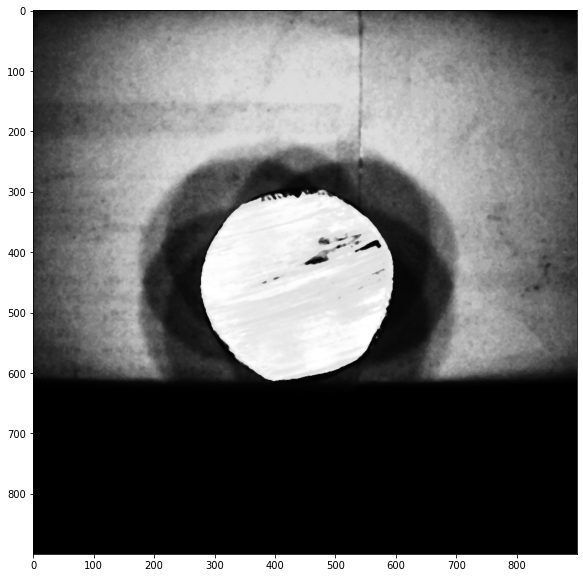

In [14]:
plt.imshow(equal_images[1], cmap='gray', vmin = 0, vmax = 255)

## Morphological processing

### Opening

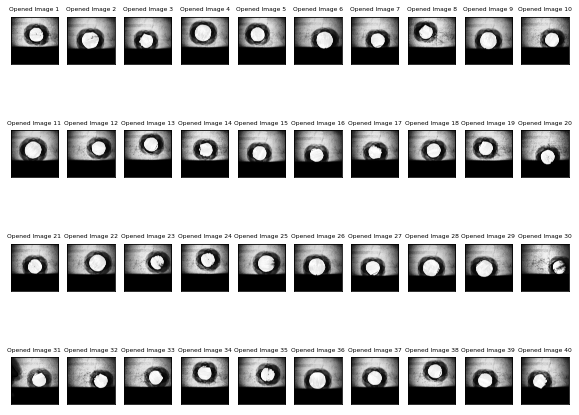

In [44]:
kernel = np.ones((5,5),np.uint8)
open_images=[]
for i in range(len(equal_images)):
    open_images.append(cv2.morphologyEx(equal_images[i], cv2.MORPH_OPEN, kernel))
    
    plt.subplot(4,10,i+1),plt.imshow(open_images[i],'gray')
    plt.title("Opened Image "+str(i+1),fontsize=6)
    plt.xticks([]),plt.yticks([])

### Closing

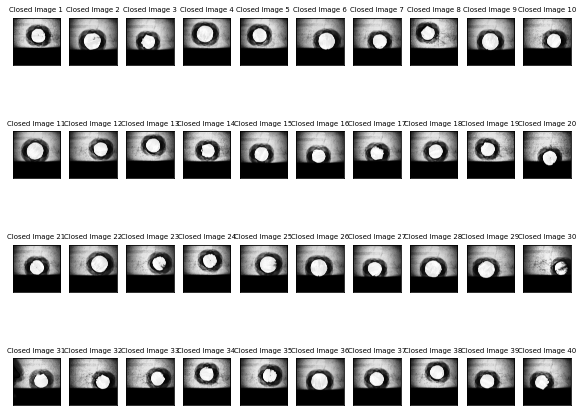

In [42]:
kernel = np.ones((5,5),np.uint8)
closed_images=[]
for i in range(len(equal_images)):
    closed_images.append(cv2.morphologyEx(open_images[i], cv2.MORPH_CLOSE, kernel))
    
    plt.subplot(4,10,i+1),plt.imshow(closed_images[i],'gray')
    plt.title("Closed Image "+str(i+1),fontsize=7)
    plt.xticks([]),plt.yticks([])

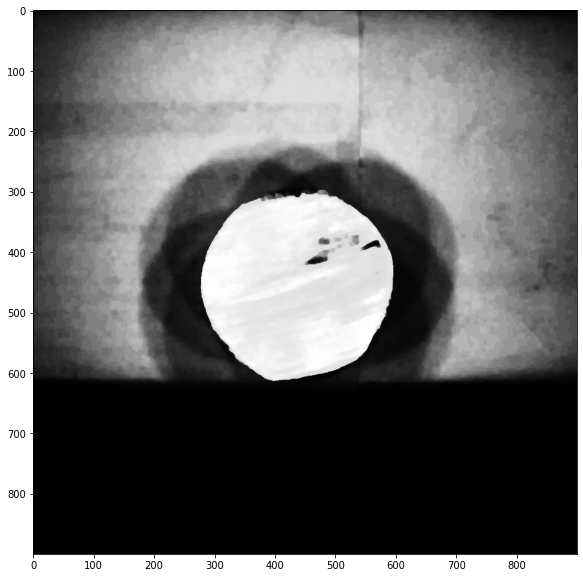

In [17]:
plt.imshow(closed_images[1], cmap='gray', vmin = 0, vmax = 255)

## Edge Detection

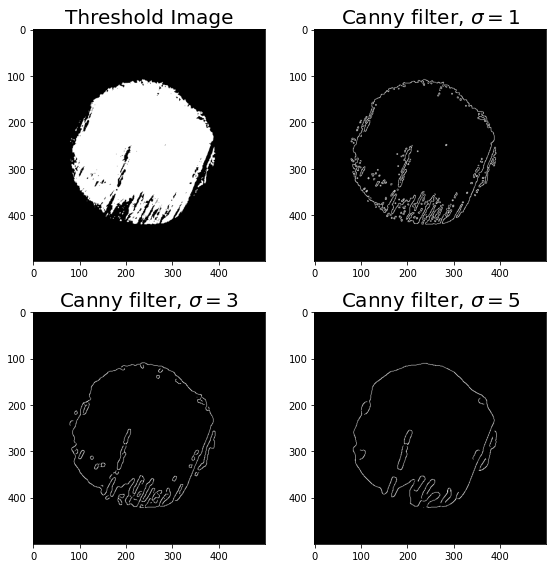

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature

image = grayThresh_y[6]

# Compute the Canny filter for two values of sigma
sigma1=3
sigma2=5
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma1)
edges3 = feature.canny(image, sigma2)

# display results
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

ax[0][0].imshow(image, cmap='gray')
ax[0][0].set_title('Threshold Image', fontsize=20)

ax[0][1].imshow(edges1, cmap='gray')
ax[0][1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[1][0].imshow(edges2, cmap='gray')
ax[1][0].set_title(r'Canny filter, $\sigma=$'+str(sigma1), fontsize=20)

ax[1][1].imshow(edges3, cmap='gray')
ax[1][1].set_title(r'Canny filter, $\sigma=$'+str(sigma2), fontsize=20)

#ax[2].imshow(edges2, cmap='gray')
#ax[2].set_title(r'Canny filter, $\sigma=$'+str(sigma), fontsize=20)

fig.tight_layout()
plt.show()

## Area Calculation

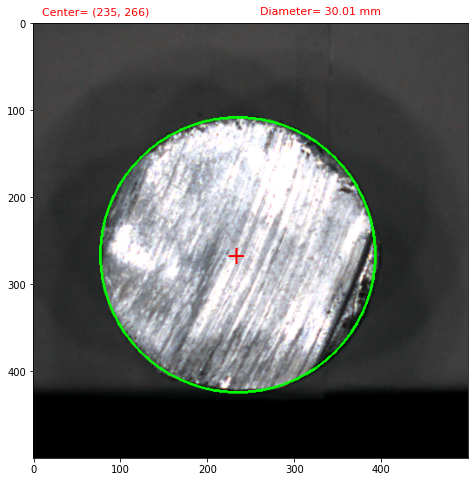

Area =  6207160.660987514 mm sq


In [106]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

img_num=6
thresh = grayThresh_y[img_num]
img=rgb_images_y[img_num]
contours,hierarchy = cv2.findContours(thresh,2,1)
thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
#print (len(contours))
cnt = contours
max_radius=0
cnt_n=-1
for i in range (len(cnt)):
    (x,y),radius = cv2.minEnclosingCircle(cnt[i])
    center = (int(x),int(y))
    radius = int(radius)
    if(radius > max_radius):
        max_radius=radius
        cnt_n=i
(x,y),radius = cv2.minEnclosingCircle(cnt[cnt_n])
center = (int(x),int(y))
radius = int(radius)
cv2.circle(img,center,radius,(0,255,0),2)
plt.text(x-15, y+10, '+', fontsize=25, color = 'red')
plt.text(10, -10, 'Center= '+str(center), fontsize=11, color = 'red')

# 9.498 = conversion factor
conversion_factor=9.498
radius=radius*conversion_factor

dia=(radius*2)/100
dia = "{:.2f}".format(dia)
plt.text(260, -10, 'Diameter= '+str(dia)+' mm', fontsize=11, color = 'red')
plt.Circle(x, y, color='red', fill=False)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
area2=math.pi*radius**2
print("Area = ",area1,'mm sq')
#print("Area2 = ",area2,'mm sq')
#print("Area2 - Area1 = ",area2-area1)
#print("Percentage% =",((area2-area1)/area2)*100)

In [109]:
def workPieceArea(workPiece_thresh_image):
    thresh = workPiece_thresh_image
    contours,hierarchy = cv2.findContours(thresh,2,1)
    thresh = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
    #print (len(contours))
    cnt = contours
    max_radius=0
    cnt_n=-1
    for i in range (len(cnt)):
        (x,y),radius = cv2.minEnclosingCircle(cnt[i])
        center = (int(x),int(y))
        radius = int(radius)
        if(radius > max_radius):
            max_radius=radius
            cnt_n=i
    (x,y),radius = cv2.minEnclosingCircle(cnt[cnt_n])
    center = (int(x),int(y))
    radius = int(radius)
    # 9.498 = conversion factor
    conversion_factor=9.498
    radius=radius*conversion_factor
    dia=(radius*2)/100
    dia = "{:.2f}".format(dia)
    area2=math.pi*radius**2
    return area2

In [110]:
workPieceAreas=[]
for i in range(len(grayThresh_y)):
    #
    r=grayThresh_y[i]
    area=workPieceArea(r)
    workPieceAreas.append(area)
print(workPieceAreas)

[7346254.254678808, 5013228.328807278, 7255279.847219532, 5165135.750608438, 4716215.310061729, 5241939.689616112, 7075031.488515172, 7075031.488515172]


## Contour Detection

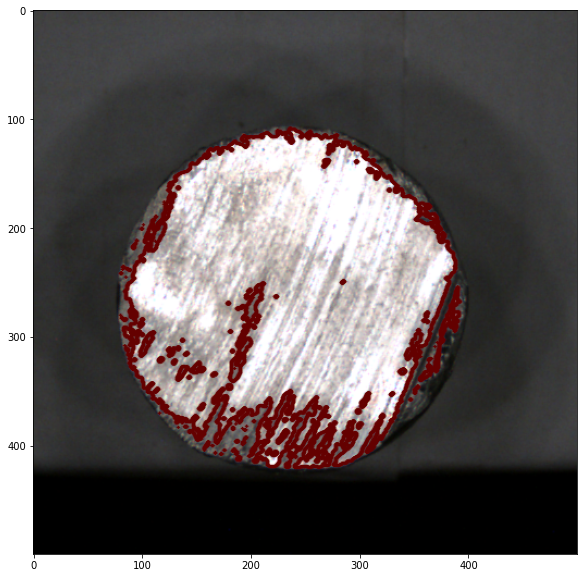

In [71]:
## Drawing Contours using CHAIN_APPROX_NONE
img=grayThresh_y[6]
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(img, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_copy = rgb_images_y[6].copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(100, 0, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
plt.imshow(image_copy,'gray')
plt.show()

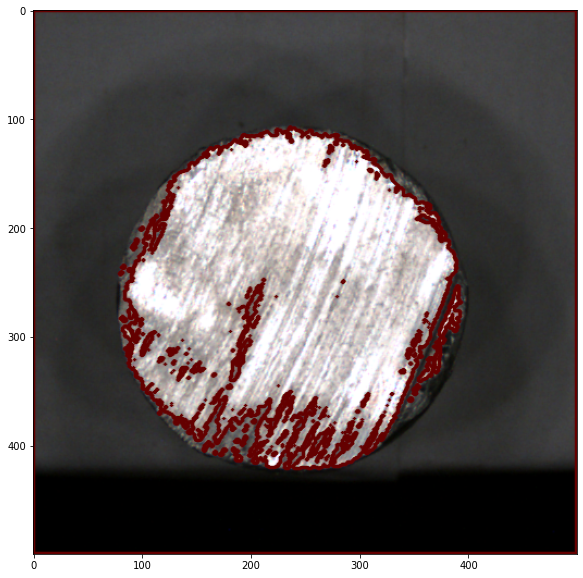

In [62]:
## Drawing Contours using CHAIN_APPROX_SIMPLE
#plt.rcParams["figure.figsize"]=5,5
# detect the contours on the binary image using cv2.ChAIN_APPROX_SIMPLE
contours1, hierarchy1 = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = rgb_images_y[6].copy()
cv2.drawContours(image_copy1, contours1, -1, (100, 0, 0), 2, cv2.LINE_AA)

# see the results
plt.imshow(image_copy1,'gray')
plt.show()

### Contour using SKIMAGE

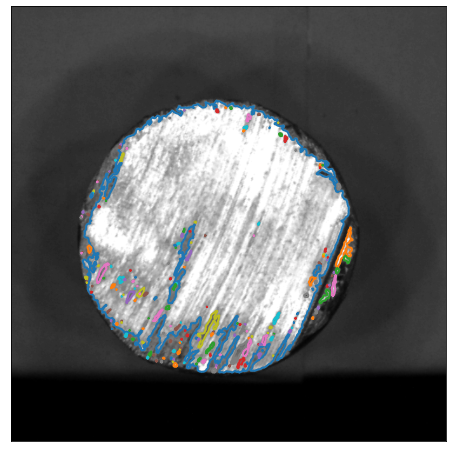

Area under Contour = 6207160.660987514 mm sq


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
plt.rcParams["figure.figsize"]=8,8

r=gray_images_y[6]

# Find contours at a constant value of 0.8
#contours = measure.find_contours(r,0.8)
contours = measure.find_contours(r)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)
area=0
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    # Expand numpy dimensions
    c = np.expand_dims(contour.astype(np.float32), 1)
    # Convert it to UMat object
    c = cv2.UMat(c)
    area += cv2.contourArea(c)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# 9.498 = conversion factor
area1=area*(9.498**2)
print("Area under Contour =",area1,"mm sq")

In [76]:
def contourArea(image_data):
    area=0
    contours = measure.find_contours(image_data)
    for contour in contours:
        # Expand numpy dimensions
        c = np.expand_dims(contour.astype(np.float32), 1)
        # Convert it to UMat object
        c = cv2.UMat(c)
        area += cv2.contourArea(c)
    # 9.498 = conversion factor
    area=area*(9.498**2)
    return area

In [80]:
countAreas=[]
for i in range(len(gray_images_y)):
    #
    r=gray_images_y[i]
    area=contourArea(r)
    countAreas.append(area)
print(countAreas)

[4935781.469091039, 4147942.587506326, 6853368.295363234, 4158824.971647896, 3325541.3872521436, 4339230.340201259, 6207160.660987514, 5804857.04108004]


## Classification on the basis Area

In [126]:
from prettytable import PrettyTable
row=[]
table = PrettyTable(['WorkPiece Area [sq mm]', 'Contour Area [sq mm]', '% of Contour','Pass/Fail'])
l1=workPieceAreas
l2=countAreas
for i in range(len(l1)):
    block=[]
    a=round(l1[i],2)
    b=round(l2[i],2)
    c=round(((a-b)/b)*100,1)
    d=""
    
    if(c >= 20):
        d="FAIL"
    else:
        d="PASS"
        
    block.append(a)
    block.append(b)
    block.append(c)
    block.append(d)
    row.append(block)

for rec in row:
    table.add_row(rec)
    
print(table)

+------------------------+----------------------+--------------+-----------+
| WorkPiece Area [sq mm] | Contour Area [sq mm] | % of Contour | Pass/Fail |
+------------------------+----------------------+--------------+-----------+
|       7346254.25       |      4935781.47      |     48.8     |    FAIL   |
|       5013228.33       |      4147942.59      |     20.9     |    FAIL   |
|       7255279.85       |      6853368.3       |     5.9      |    PASS   |
|       5165135.75       |      4158824.97      |     24.2     |    FAIL   |
|       4716215.31       |      3325541.39      |     41.8     |    FAIL   |
|       5241939.69       |      4339230.34      |     20.8     |    FAIL   |
|       7075031.49       |      6207160.66      |     14.0     |    PASS   |
|       7075031.49       |      5804857.04      |     21.9     |    FAIL   |
+------------------------+----------------------+--------------+-----------+


## Image Segmentation

### Binary Thresholding

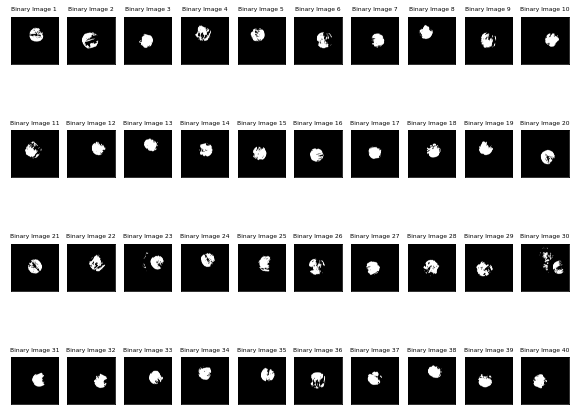

In [41]:
binary_images=[]
for i in range(len(closed_images)):
    ret,thresh = cv2.threshold(closed_images[i],235,255,cv2.THRESH_BINARY)
    binary_images.append(thresh)
    
    plt.subplot(4,10,i+1),plt.imshow(binary_images[i],'gray')
    plt.title("Binary Image "+str(i+1),fontsize=6)
    plt.xticks([]),plt.yticks([])

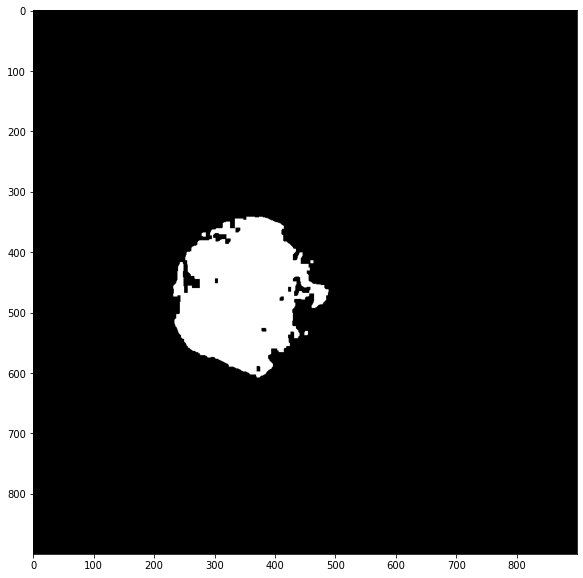

In [19]:
plt.imshow(binary_images[39], cmap='gray', vmin = 0, vmax = 255)

### Otsu Thresholding

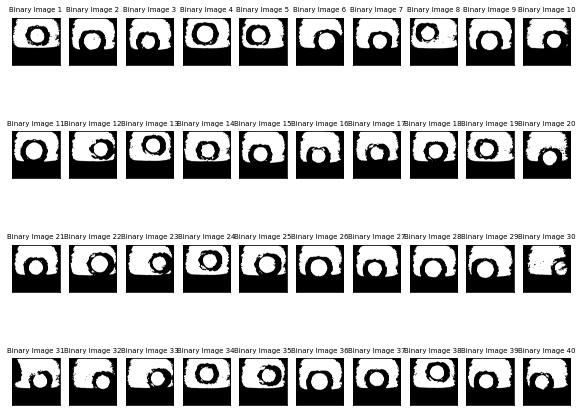

In [39]:
otsu_images=[]
for i in range(len(closed_images)):
    ret,thresh = cv2.threshold(closed_images[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    otsu_images.append(thresh)
    
    plt.subplot(4,10,i+1),plt.imshow(otsu_images[i],'gray')
    plt.title("Binary Image "+str(i+1),fontsize=7)
    plt.xticks([]),plt.yticks([])

### Adaptive Thresholding

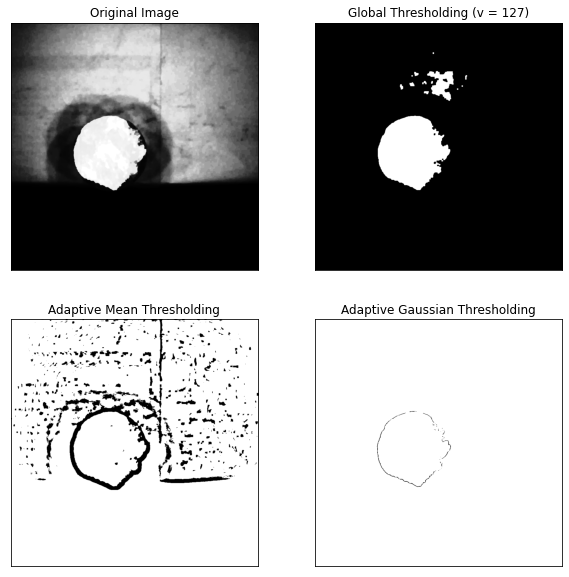

In [21]:
plt.rcParams["figure.figsize"]=2*5,2*5
titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
adaptive_images=[]
for i in range(len(closed_images)):
    ret,th1 = cv2.threshold(closed_images[i],230,255,cv2.THRESH_BINARY)
    th2 = cv2.adaptiveThreshold(closed_images[i],255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,33,10)
    th3 = cv2.adaptiveThreshold(closed_images[i],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,40) 
    aThresh_images= [closed_images[i], th1, th2, th3]
    adaptive_images.append(aThresh_images)

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(aThresh_images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
## to add display



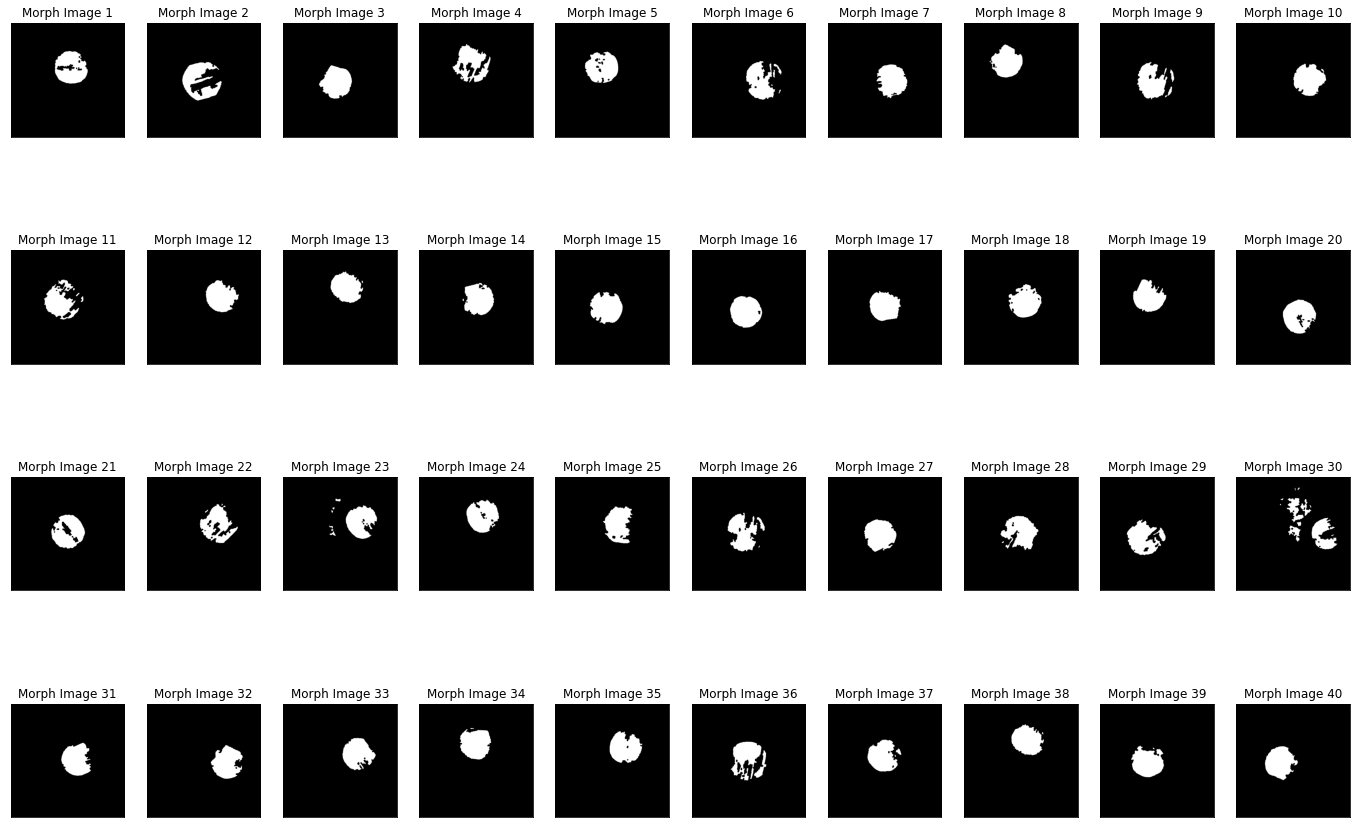

In [23]:
from skimage import data
from skimage import color
from skimage import morphology
from skimage import segmentation
plt.rcParams["figure.figsize"]=24,16

morph_images=[]
for i in range(len(closed_images)):
    lum = closed_images[i]
    mask = morphology.remove_small_holes(morphology.remove_small_objects(lum < 235,255))
    mask = morphology.opening(mask, morphology.disk(5))
    morph_images.append(~mask)
    
    plt.subplot(4,10,i+1),plt.imshow(morph_images[i],'gray')
    plt.title("Morph Image "+str(i+1))
    plt.xticks([]),plt.yticks([])





## Feature Extraction

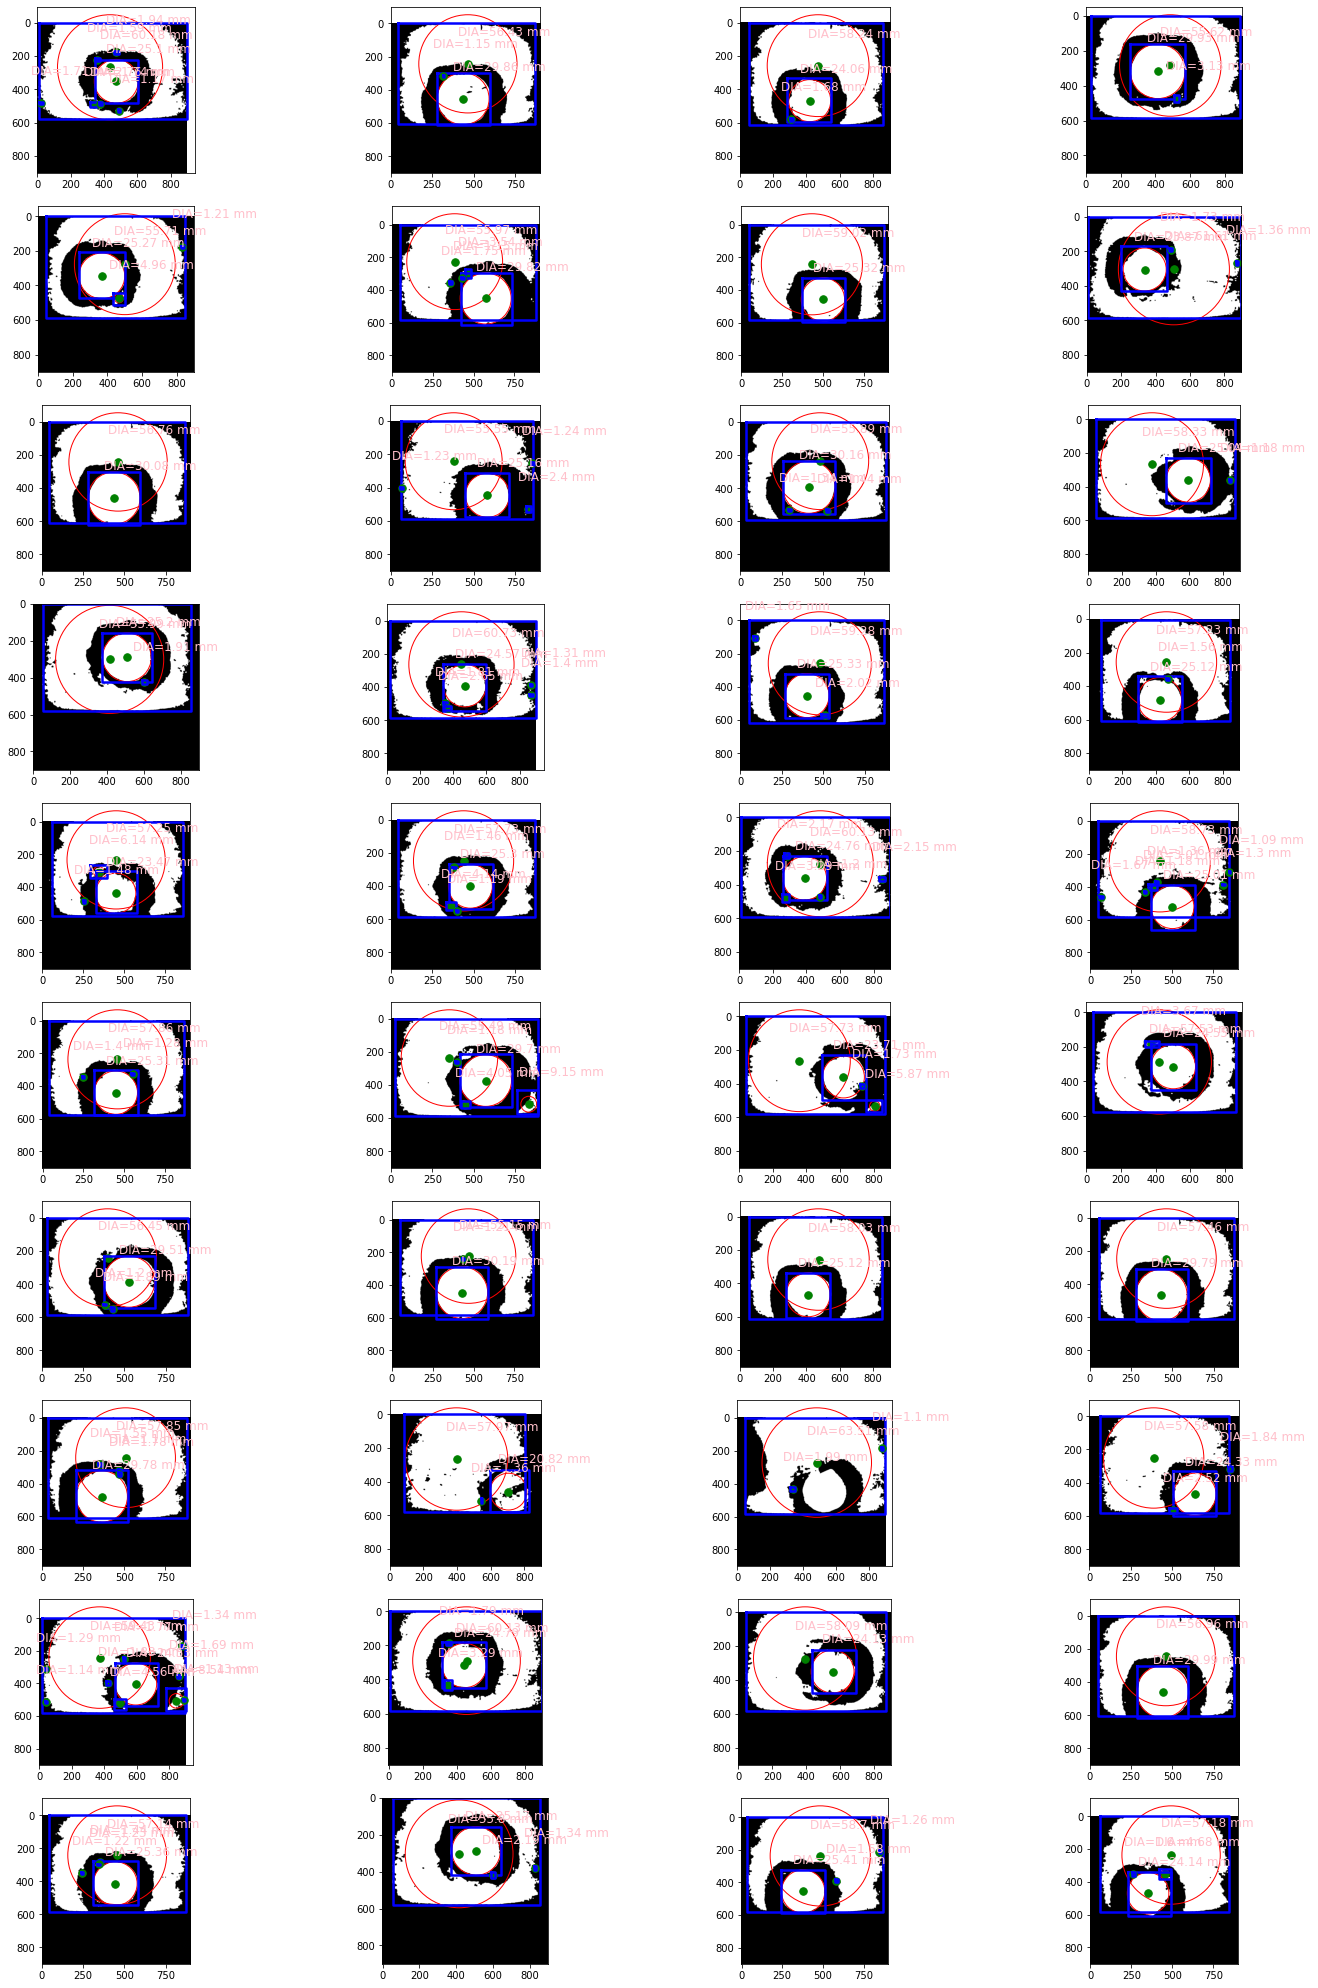

In [24]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import math
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import erosion, dilation, opening, closing
from skimage.measure import label, regionprops
from skimage.color import label2rgb


   
#    plt.subplot(4,10,i+1),plt.imshow(binary_images[i],'gray')
#    plt.title("Binary Image "+str(i+1))
 #   plt.xticks([]),plt.yticks([])
#plt.subplot(4,10,1)#,plt.imshow(binary_images[i],'gray')
index_i=10
index_j=4
count=0
plt.rcParams["figure.figsize"]=6*4,6*6
fig, ax = plt.subplots(index_i,index_j)
rad_list=[]
main_rad_list=[]
for i in range(index_i):
    for j in range(index_j):

        #img=adaptive_images[count][1]
        img=otsu_images[count]
        # Binary image, post-process the binary mask and compute labels
        threshold = filters.threshold_otsu(img)
        mask = img > threshold
        mask = morphology.remove_small_objects(mask, 100)
        mask = morphology.remove_small_holes(mask,150)
        labels = measure.label(mask)

        fig = px.imshow(img, binary_string=True)
        fig.update_traces(hoverinfo='skip') # hover is only for label info

        props = measure.regionprops(labels, img)
        properties = ['area', 'eccentricity', 'perimeter']



        #blobs = blob_log(otsu_images[j], max_sigma=120, min_sigma = 90, num_sigma=1, threshold=0.1, overlap = 0.1)

        #label_img = label(otsu_images[j])
        regions = regionprops(labels)
        count=count+1
        ax[i][j].imshow(img, cmap='gray')
        for props in regions:
            
            y0, x0 = props.centroid
            #print(getattr(props, 'area'))
            area=getattr(props, 'area')
            radi=np.sqrt(area/math.pi)/5.24

        # y, x, area = blob
            ax[i][j].add_patch(plt.Circle((x0, y0), radi*5.24, color='r',fill=False))
            #Dia=area*np.sqrt(2)/4.25 # conversion factor
            Dia=float("{0:.2f}".format(radi))
            str_dia="DIA="+ "% s" % Dia +" mm"
            ax[i][j].text(x0-60,y0-170,str_dia, color='pink',fontsize=12)

            
            orientation = props.orientation
            ax[i][j].plot(x0, y0, '.g', markersize=15)

            minr, minc, maxr, maxc = props.bbox
            bx = (minc, maxc, maxc, minc, minc)
            by = (minr, minr, maxr, maxr, minr)

            ax[i][j].plot(bx, by, '-b', linewidth=2.5)          
            if (radi>23 and radi<26):
                rad_list.append([radi])
        
        main_rad_list.append(0 if len(rad_list)==0 else 1)
        rad_list=[]

#print(main_rad_list)





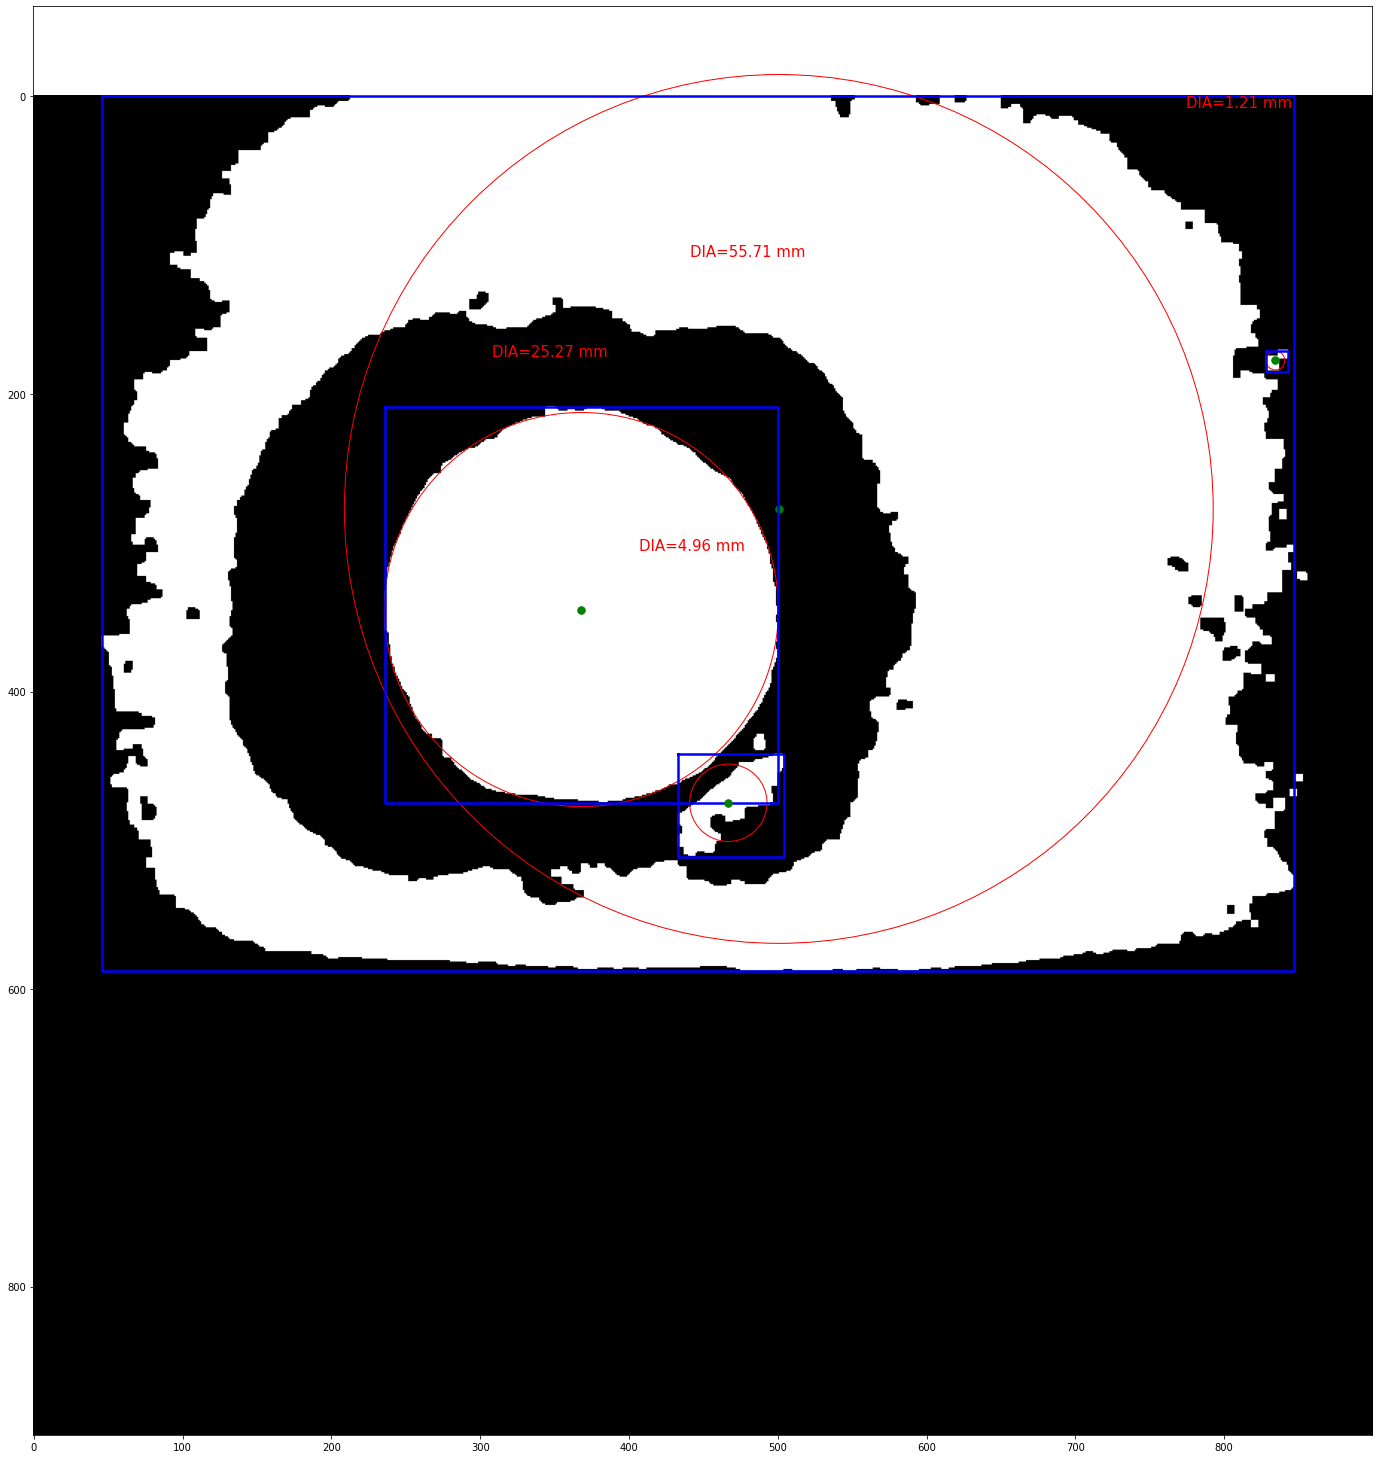

In [25]:
fig, ax = plt.subplots()
img=otsu_images[4]
threshold = filters.threshold_otsu(img)
mask = img > threshold
mask = morphology.remove_small_objects(mask, 100)
mask = morphology.remove_small_holes(mask,150)
labels = measure.label(mask)

fig = px.imshow(img, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info

props = measure.regionprops(labels, img)
properties = ['area', 'eccentricity', 'perimeter']



#blobs = blob_log(otsu_images[j], max_sigma=120, min_sigma = 90, num_sigma=1, threshold=0.1, overlap = 0.1)

#label_img = label(otsu_images[j])
regions = regionprops(labels)
ax.imshow(img, cmap='gray')
for props in regions:
            
            y0, x0 = props.centroid
            #print(getattr(props, 'area'))
            area=getattr(props, 'area')
            radi=np.sqrt(area/math.pi)/5.24

        # y, x, area = blob
            ax.add_patch(plt.Circle((x0, y0), radi*5.24, color='r',fill=False))
            #Dia=area*np.sqrt(2)/4.25 # conversion factor
            Dia=float("{0:.2f}".format(radi))
            str_dia="DIA="+ "% s" % Dia +" mm"
            ax.text(x0-60,y0-170,str_dia, color='red',fontsize=15)

            
            orientation = props.orientation
            ax.plot(x0, y0, '.g', markersize=15)

            minr, minc, maxr, maxc = props.bbox
            bx = (minc, maxc, maxc, minc, minc)
            by = (minr, minr, maxr, maxr, minr)

            ax.plot(bx, by, '-b', linewidth=2.5)          
            rad_list.append([radi])




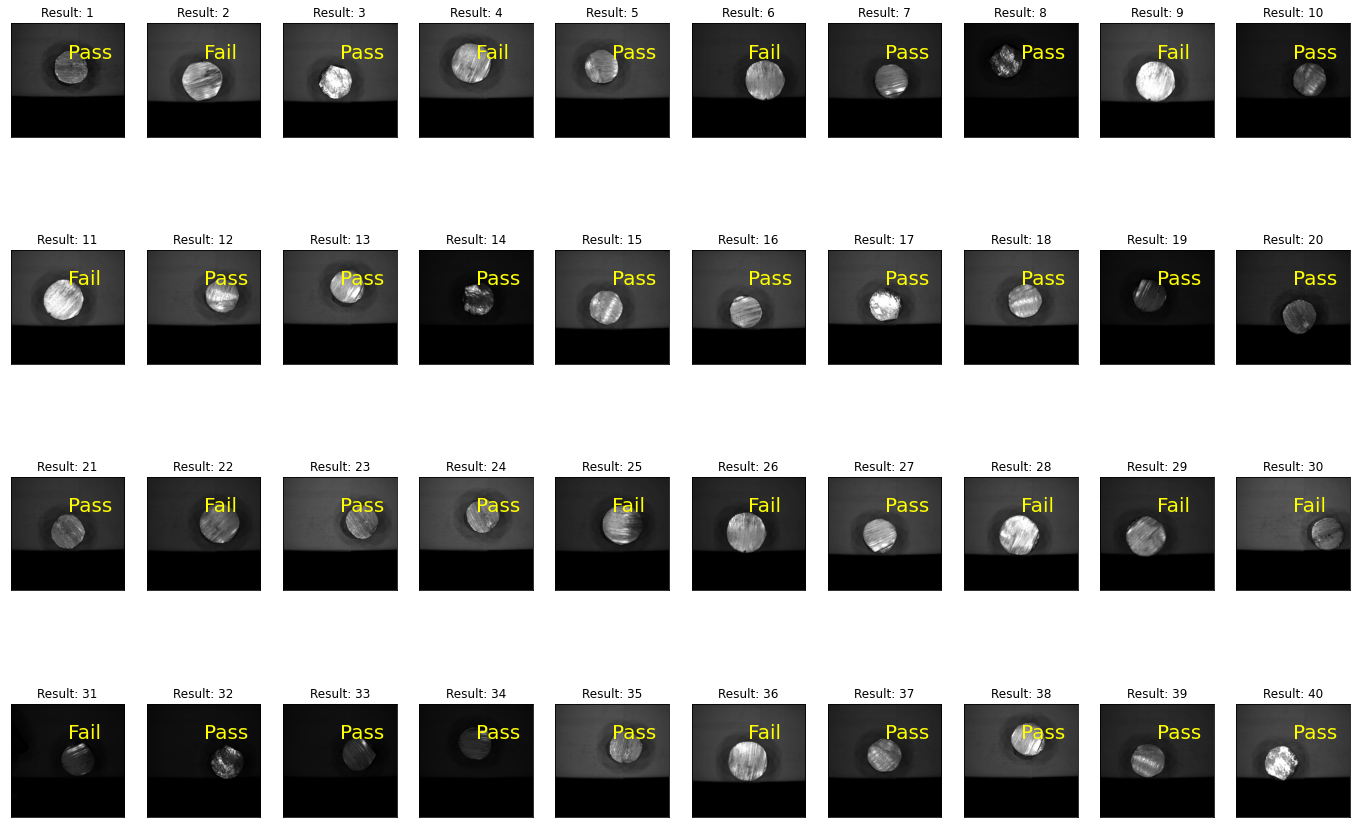

In [26]:
plt.rcParams["figure.figsize"]=24,16
for i in range(len(gray_images)):

    plt.subplot(4,10,i+1),plt.imshow(smooth_images[i],'gray')
    str_dia="Pass" if main_rad_list[i]==1 else "Fail"
    plt.text(450,450-170,str_dia, color='Yellow',fontsize=20)
    plt.title("Result: "+str(i+1))
    plt.xticks([]),plt.yticks([])


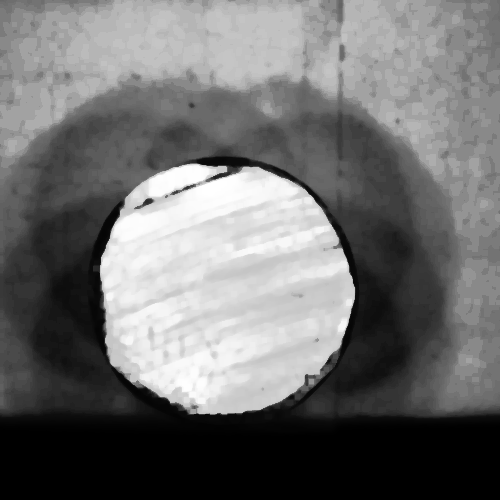

In [142]:
img=gray_images_y[4]
smooth = cv2.medianBlur(gray_images_y[4], 5)
equal = cv2.equalizeHist(smooth)
img=cv2.morphologyEx(equal, cv2.MORPH_OPEN, kernel)
#img=equal
# Binary image, post-process the binary mask and compute labels
threshold = filters.threshold_otsu(img)
mask = img > threshold
mask = morphology.remove_small_objects(mask, 50)
mask = morphology.remove_small_holes(mask, 50)
labels = measure.label(mask)

fig = px.imshow(img, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info
props = measure.regionprops(labels, img)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']
# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(go.Scatter(
        x=x, y=y, name=label_i,
        mode='lines', fill='toself', showlegend=False,
        hovertemplate=hoverinfo, hoveron='points+fills'))

plotly.io.show(fig)

## Results and Discussion

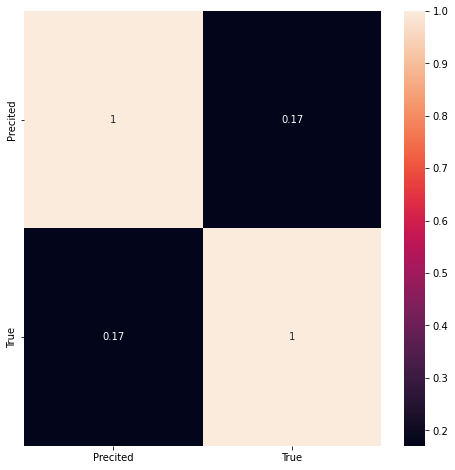

In [28]:
#print(len(meta_data))
import seaborn as sns

plt.rcParams["figure.figsize"]=8,8 
r=np.corrcoef(main_rad_list,meta_data)
ax = sns.heatmap(r,xticklabels=['Precited','True'],yticklabels=['Precited','True'],annot=True)

In [31]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(meta_data,main_rad_list)

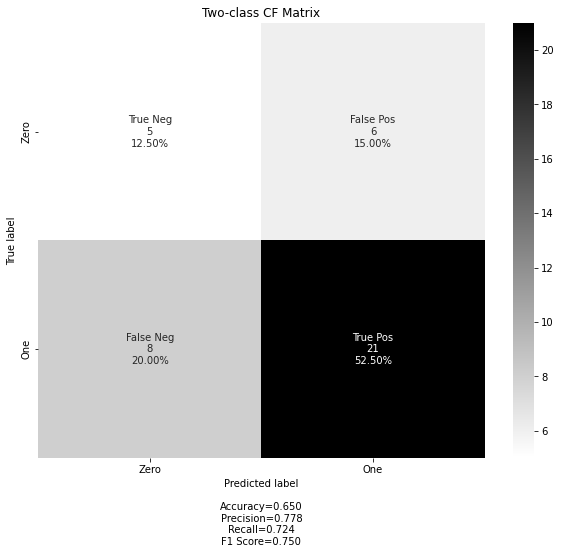

In [32]:
plt.rcParams["figure.figsize"]=10,8 
from cf_matrix import make_confusion_matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, cmap='binary', title='Two-class CF Matrix')



# What Next?

Quality Inspection in real time

# Annexure



<img src=".\measure.jpeg">

Workpiece Dia = 30.01 mm
Predict Dia =  157.6 px

i.e converstion factor =5.24

# References

Gonzalez, Rafael C. and Woods, Richard E.. Digital image processing. Upper Saddle River, N.J.: Prentice Hall, 2008

W. Sriratana, N. Narknam, R. Apichitanon and N. Tammarugwattana, "Application of Webcam for Inspection of Rice Grain Quality by Using Image Processing Technique," 2020 20th International Conference on Control, Automation and Systems (ICCAS), 2020, pp. 1134-1139, doi: 10.23919/ICCAS50221.2020.9268316.

https://learnopencv.com/contour-detection-using-opencv-python-c/

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html  

https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html  

https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html  

https://github.com/DTrimarchi10/confusion_matrix